In [1]:
import os 
import sys
import glob
import numpy as np
import pandas as pd
from netCDF4 import Dataset

import seaborn as sns
import proplot as plot

In [2]:
filename1 = "/umbc/xfs1/cybertrn/common/MODIS/OUTPUT/MYD08_L3.A2008002.serial_output_twoday.h5" #"test_result/MYD08_L3.A2008001.serial_output_daily_5km_v3.h5"
compared_name = 'Mean'

hdf = Dataset(filename1,'r')
cld_pixel1 = np.array(hdf.variables["cloud_fraction_{}".format(compared_name)][:])
scale_factor           = hdf.variables["cloud_fraction_{}".format(compared_name)].scale_factor
fillvalue              = hdf.variables["cloud_fraction_{}".format(compared_name)]._FillValue
offset                 = hdf.variables["cloud_fraction_{}".format(compared_name)].add_offset
cld_pixel1[np.where(cld_pixel1 == fillvalue)] = np.nan
cld_pixel1 = (cld_pixel1 - offset) / scale_factor 
cld_pixel1 = (cld_pixel1 - offset) * scale_factor 

cld_fraction1 = np.array(hdf.variables["cloud_fraction_{}".format("Mean")][:])
scale_factor           = hdf.variables["cloud_fraction_{}".format("Mean")].scale_factor
fillvalue              = hdf.variables["cloud_fraction_{}".format("Mean")]._FillValue
offset                 = hdf.variables["cloud_fraction_{}".format("Mean")].add_offset
cld_fraction1[np.where(cld_fraction1 == fillvalue)] = np.nan
#print(cld_fraction1)
cld_fraction1 = (cld_fraction1 - offset) / scale_factor 
cld_fraction1 = (cld_fraction1 - offset) * scale_factor 

#cloud_top_temperature
temp1 = np.array(hdf.variables["cloud_top_temperature_{}".format(compared_name)][:])
scale_factor   = hdf.variables["cloud_top_temperature_{}".format(compared_name)].scale_factor
fillvalue      = hdf.variables["cloud_top_temperature_{}".format(compared_name)]._FillValue
offset         = hdf.variables["cloud_top_temperature_{}".format(compared_name)].add_offset
temp1[np.where(temp1 == fillvalue)] = np.nan
print(temp1[~np.isnan(temp1)])
temp1 = (temp1 - offset) / scale_factor 
print(temp1[~np.isnan(temp1)])
temp1 = (temp1 - offset) * scale_factor 
print(temp1[~np.isnan(temp1)])


#temp1 = temp1 + offset

#cloud_top_height
emis1 = np.array(hdf.variables["cloud_top_height_{}".format(compared_name)][:])
scale_factor   = hdf.variables["cloud_top_height_{}".format(compared_name)].scale_factor
fillvalue      = hdf.variables["cloud_top_height_{}".format(compared_name)]._FillValue
offset         = hdf.variables["cloud_top_height_{}".format(compared_name)].add_offset
emis1[np.where(emis1 == fillvalue)] = np.nan
emis1 = (emis1 - offset) / scale_factor 
emis1 = (emis1 - offset) * scale_factor 
print(scale_factor)

#cloud_top_pressure
pres1 = np.array(hdf.variables["cloud_top_pressure_{}".format(compared_name)][:])
scale_factor   = hdf.variables["cloud_top_pressure_{}".format(compared_name)].scale_factor
fillvalue      = hdf.variables["cloud_top_pressure_{}".format(compared_name)]._FillValue
offset         = hdf.variables["cloud_top_pressure_{}".format(compared_name)].add_offset
pres1[np.where(pres1 == fillvalue)] = np.nan
pres1 = (pres1 - offset) / scale_factor 
pres1 = (pres1 - offset) * scale_factor 


#filename2 = "/umbc/xfs1/zzbatmos/users/jzheng3/CMAC_project/test_result/MYD08_M3.A2008001.061.2018031233204.hdf" 
filename2 = "/umbc/xfs1/zzbatmos/common/Data/MODIS/6/MYD08_D3/MYD08_D3.A2008001.006.2015088011904.hdf" 

hdf = Dataset(filename2,'r')
cld_pixel2    = np.array(np.flip(hdf.variables["Cloud_Fraction_{}".format(compared_name)][:],0)).astype(float)
scale_factor                   = hdf.variables["Cloud_Fraction_{}".format(compared_name)].scale_factor
fillvalue                      = hdf.variables["Cloud_Fraction_{}".format(compared_name)]._FillValue
offset                         = hdf.variables["Cloud_Fraction_{}".format(compared_name)].add_offset
cld_pixel2[np.where(cld_pixel2 == fillvalue)] = np.nan
cld_pixel2 = (cld_pixel2 - offset) / scale_factor 
cld_pixel2 = (cld_pixel2 - offset) * scale_factor 

cld_fraction2 = np.array(np.flip(hdf.variables["Cloud_Fraction_{}".format("Mean")][:],0)).astype(float)
scale_factor                   = hdf.variables["Cloud_Fraction_{}".format("Mean")].scale_factor
fillvalue                      = hdf.variables["Cloud_Fraction_{}".format("Mean")]._FillValue
offset                         = hdf.variables["Cloud_Fraction_{}".format("Mean")].add_offset
cld_fraction2[np.where(cld_fraction2 == fillvalue)] = np.nan
cld_fraction2 = (cld_fraction2 - offset) / scale_factor 
cld_fraction2 = (cld_fraction2 - offset) * scale_factor 

temp2 = np.array(np.flip(hdf.variables["Cloud_Top_Temperature_{}".format(compared_name)][:],0)).astype(float)
scale_factor           = hdf.variables["Cloud_Top_Temperature_{}".format(compared_name)].scale_factor
fillvalue              = hdf.variables["Cloud_Top_Temperature_{}".format(compared_name)]._FillValue
offset                 = hdf.variables["Cloud_Top_Temperature_{}".format(compared_name)].add_offset
temp2[np.where(temp2 == fillvalue)] = np.nan
temp2 = (temp2 - offset) / scale_factor 
temp2 = (temp2 - offset) * scale_factor 

emis2 = np.array(np.flip(hdf.variables["Cloud_Top_Height_Nadir_{}".format(compared_name)][:],0)).astype(float)
scale_factor           = hdf.variables["Cloud_Top_Height_Nadir_{}".format(compared_name)].scale_factor
fillvalue              = hdf.variables["Cloud_Top_Height_Nadir_{}".format(compared_name)]._FillValue
offset                 = hdf.variables["Cloud_Top_Height_Nadir_{}".format(compared_name)].add_offset
emis2[np.where(emis2 == fillvalue)] = np.nan
emis2 = (emis2 - offset) / scale_factor 
emis2 = (emis2 - offset) * scale_factor 
print(scale_factor)

pres2 = np.array(np.flip(hdf.variables["Cloud_Top_Pressure_{}".format(compared_name)][:],0)).astype(float)
scale_factor           = hdf.variables["Cloud_Top_Pressure_{}".format(compared_name)].scale_factor
fillvalue              = hdf.variables["Cloud_Top_Pressure_{}".format(compared_name)]._FillValue
offset                 = hdf.variables["Cloud_Top_Pressure_{}".format(compared_name)].add_offset
pres2[np.where(pres2 == fillvalue)] = np.nan
pres2 = (pres2 - offset) / scale_factor 
pres2 = (pres2 - offset) * scale_factor 


[-14909.30000203 -14909.14000203 -14909.23000203 ... -14921.92000175
 -14921.35000176 -14916.89000186]
[9070. 9086. 9077. ... 7808. 7865. 8311.]
[240.69999462 240.85999462 240.76999462 ... 228.0799949  228.64999489
 233.10999479]
1.0
1.0


/umbc/xfs1/zzbatmos/common/Softwares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in true_divide
/umbc/xfs1/zzbatmos/common/Softwares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


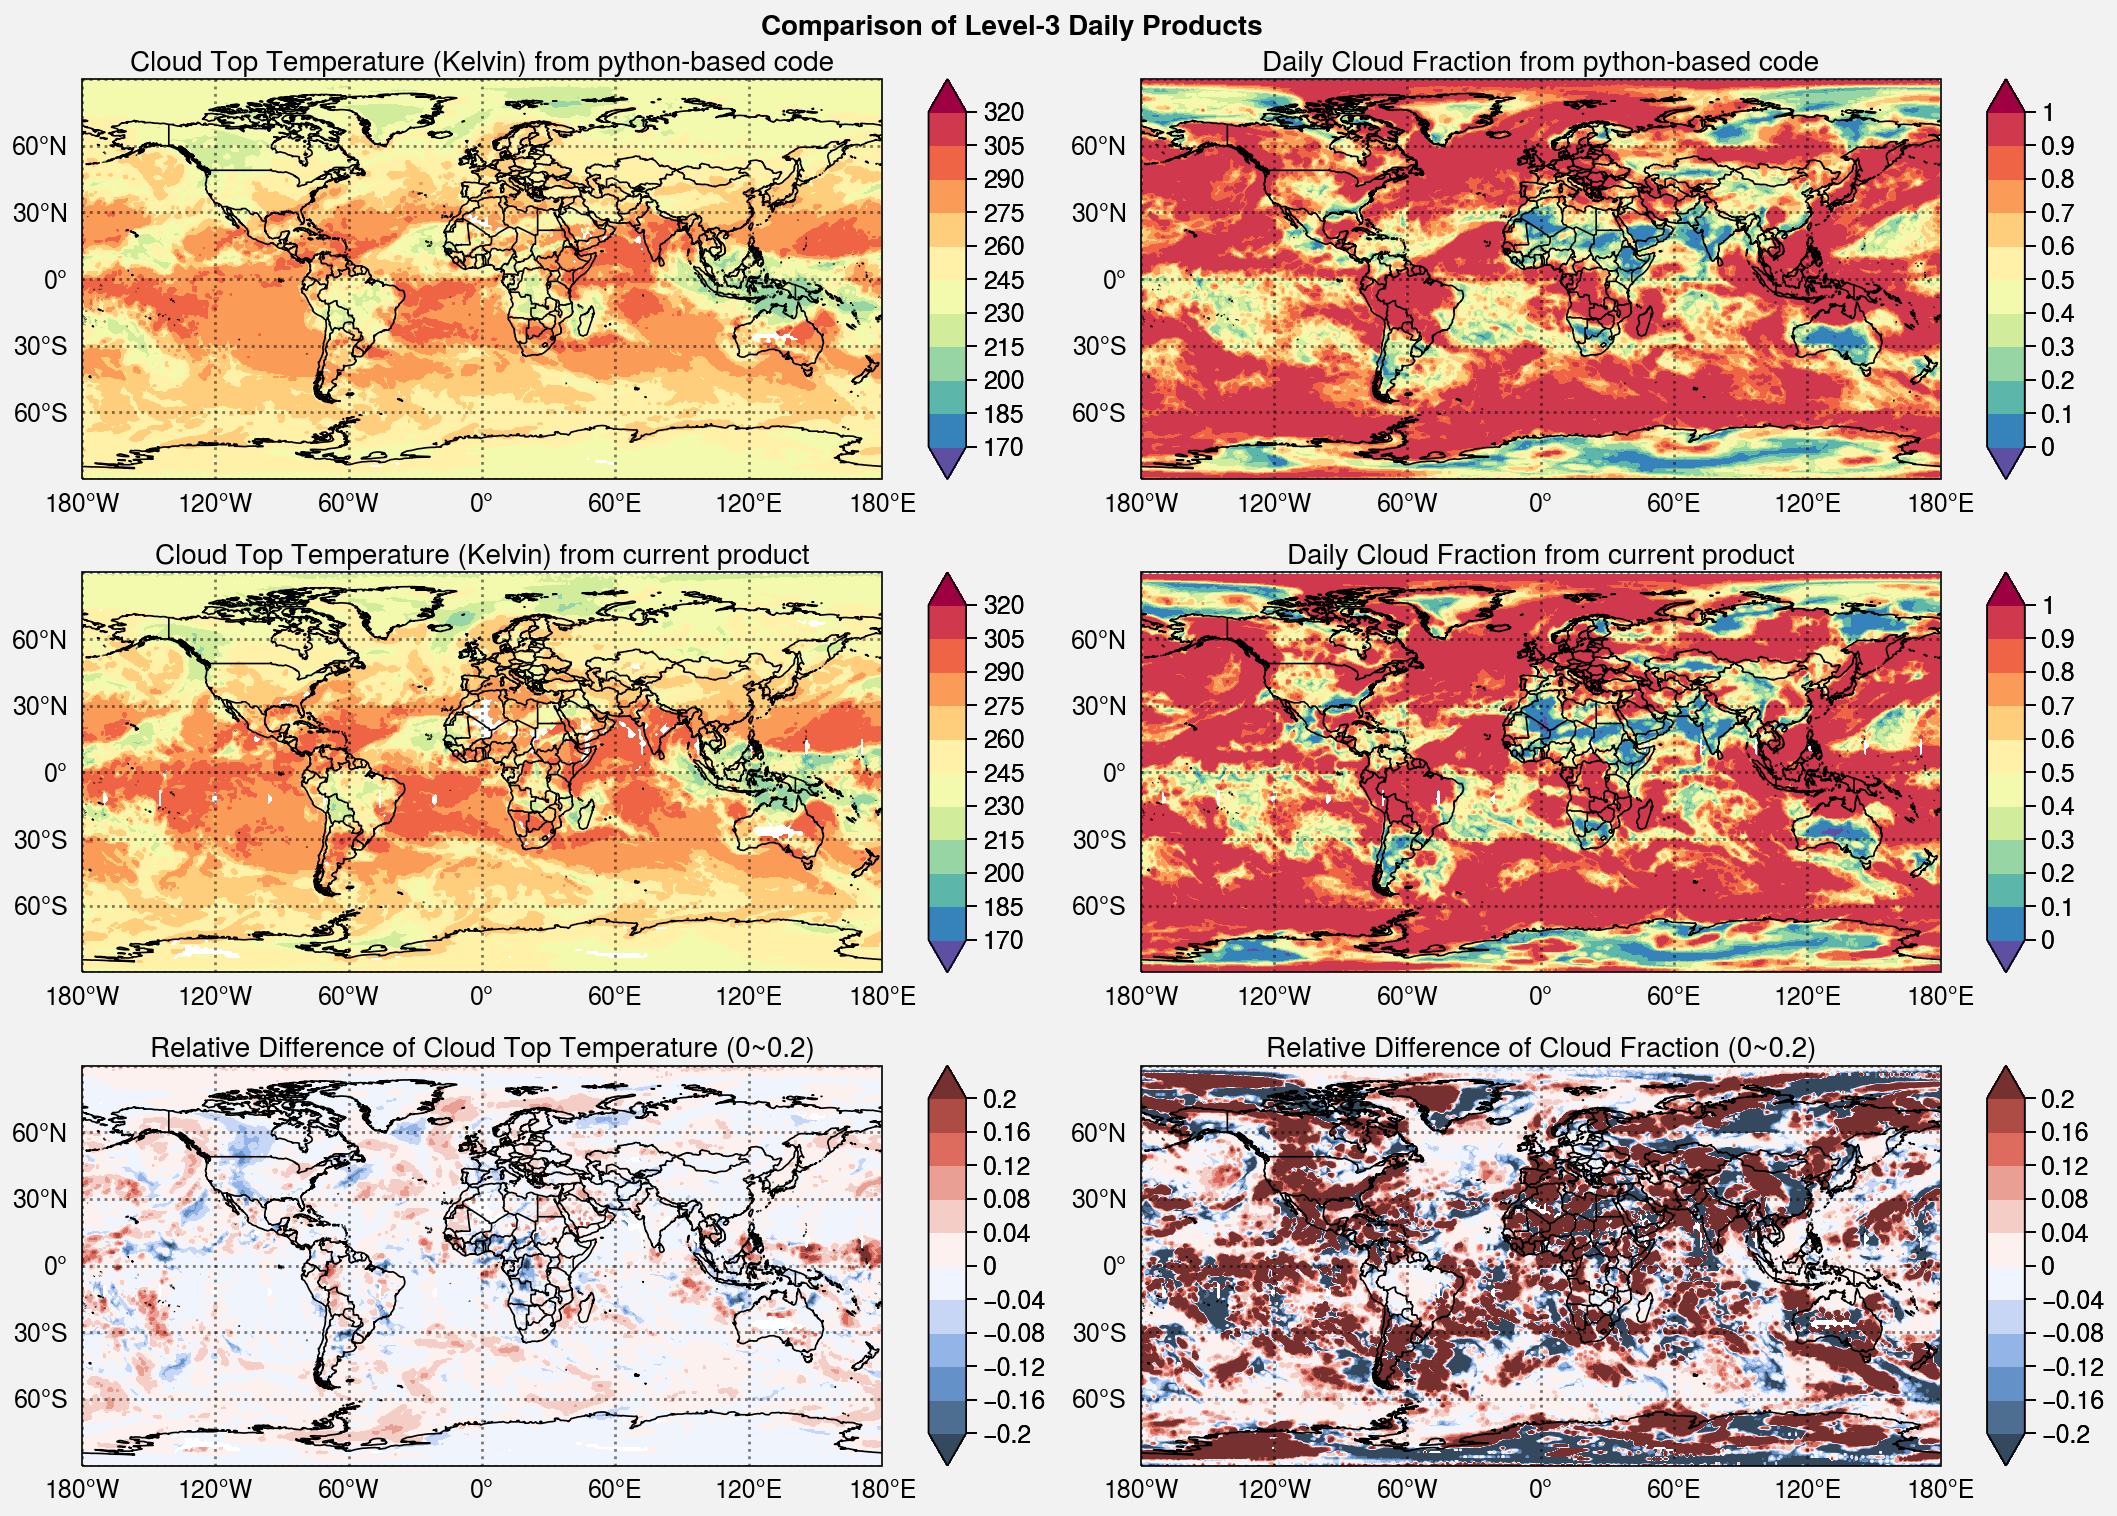

In [3]:
NTA_lats = [-90,90]     
NTA_lons = [-180,180] 

gap_x, gap_y = 1, 1

levels  = 11
map_lon = np.arange(-180,180,gap_x)
map_lat = np.arange(-90,90,gap_y)
Lon,Lat = np.meshgrid(map_lon,map_lat)

fig, axs = plot.subplots(nrows=3,ncols=2,aspect=2,axwidth=4,basemap=False, proj='cyl') #proj_kw={'lon_0': 180})
ticks1 = np.linspace(170,320,11)
ticks2 = np.linspace(0,1,11)
ticks3 = np.linspace(-0.2,0.2,11)
ticks4 = np.linspace(-10,10,11)

m = axs[0,0].contourf(
        map_lon, map_lat, temp1, levels=ticks1, extend='both',
        cmap='Spectral', norm='segmented',
        colorbar='r', colorbar_kw={'ticks': ticks1})

axs[0,0].format(title='Cloud Top Temperature (Kelvin) from python-based code')

map_lon = np.arange(-180,180,gap_x)
map_lat = np.arange(-90,90,gap_y)
Lon,Lat = np.meshgrid(map_lon,map_lat)

m = axs[1,0].contourf(
        map_lon, map_lat, temp2, levels=ticks1, extend='both',
        cmap='SPectral', norm='segmented',
        colorbar='r', colorbar_kw={'ticks': ticks1})

axs[1,0].format(title='Cloud Top Temperature (Kelvin) from current product')

m = axs[2,0].contourf(
        map_lon, map_lat, (temp1-temp2)/temp1, levels=ticks3, extend='both',
        cmap='NegPos', norm='segmented',
        colorbar='r', colorbar_kw={'ticks': ticks3})

axs[2,0].format(title='Relative Difference of Cloud Top Temperature (0~0.2)')

m = axs[0,1].contourf(
        map_lon, map_lat, cld_fraction1, levels=ticks2, extend='both',
        cmap='Spectral', norm='segmented',
        colorbar='r', colorbar_kw={'ticks': ticks2})

axs[0,1].format(title='Daily Cloud Fraction from python-based code')

map_lon = np.arange(-180,180,gap_x)
map_lat = np.arange(-90,90,gap_y)
Lon,Lat = np.meshgrid(map_lon,map_lat)

m = axs[1,1].contourf(
        map_lon, map_lat, cld_fraction2, levels=ticks2, extend='both',
        cmap='SPectral', norm='segmented',
        colorbar='r', colorbar_kw={'ticks': ticks2})

axs[1,1].format(title='Daily Cloud Fraction from current product')

m = axs[2,1].contourf(
        map_lon, map_lat, (cld_fraction1-cld_fraction2)/cld_fraction1, levels=ticks3, extend='both',
        cmap='NegPos', norm='segmented',
        colorbar='r', colorbar_kw={'ticks': ticks3})

axs[2,1].format(title='Relative Difference of Cloud Fraction (0~0.2)')

axs.format(
    suptitle='Comparison of Level-3 Daily Products',
    landcolor='mushroom', facecolor='white', land=False, 
    reso='med', borders=True, titleborder=True,
    lonlabels='b', latlabels='l',coast=True,latlines=30, lonlines=60)

#fig.savefig("/umbc/xfs1/zzbatmos/users/jzheng3/CMAC_project/plots_storing/for_paper/Daily_comparison_5km.png",facecolor='white',dpi=300)


